# <span style="color:red"> Lecture 9: Loop Application - Simulating Random Variables </span>

<font size="5"> 

In this class we will:

- Use loops within an actual context: simulating random variables

## <span style="color:red"> I. Import Libraries </span>

In [9]:
import numpy as np
import matplotlib.pyplot as plt


## <span style="color:red"> II. Visualizing Random Variables </span>

<font size = "5" >

Consider a sample with $n$ observations

$ X = \begin{pmatrix} X_1 \\ X_2 \\ \vdots \\ X_n \end{pmatrix}.$

<font size = "5" > We can simulate from different probability distributions. Some common ones are:

- The normal distribution with mean $\mu$ and standard deviation (s.d.) $\sigma$
    - The **standard** normal distribution has mean $\mu = 0$ and s.d. $\sigma = 1$
- The $\chi^2$-distribution ("chi-squared") with $k$ degrees of freedom.
    - If you take $k$ standard normal samples and add up their squares, you get a single sample from a chi-squared distribution with $k$ degrees of freedom.
- The uniform distribution with endpoints $a < b$.

In [10]:
# Set sample size
n = 10000

# Draw n samples from normal distribution with mean = -2, s.d. = 6
normal_samples = np.random.normal(loc = -2, scale = 6, size = n)

# Draw n samples from chi-squared distribution with 4 degrees of freedom
chisqr_samples = np.random.chisquare(df = 4, size = n)

# Draw n samples from uniform distribution with a = -3, b = 5
unif_samples = np.random.uniform(low = -3, high = 5, size = n)

In [11]:
# np.random.normal and np.random.uniform have some default inputs

# Draw n samples from standard normal distribution (mean = 0, s.d. = 1)
# Default: loc = 0
# Default: scale = 1
std_normal_samples = np.random.normal(size = n)

# Draw n samples from uniform distribution over unit interval (a = 0, b = 1)
# Default: low = 0
# Default: high = 1
unit_unif_samples = np.random.uniform(size = n)



<font size = "5">

The sample average is defined as 

$$ \bar{X} = \frac{1}{n}\sum_{i=1}^n X_i $$

In [12]:
# Let's print of each of the above random variables

print(normal_samples.mean())
print(chisqr_samples.mean())
print(unif_samples.mean())
print(std_normal_samples.mean())
print(unit_unif_samples.mean())

-1.9665252212919557
4.015543413384793
0.9946223554268214
-0.009469909874407318
0.4975971908144684


In [13]:
# Could also do:
print(np.mean(normal_samples))
print(np.mean(chisqr_samples))
print(np.mean(unif_samples))
print(np.mean(std_normal_samples))
print(np.mean(unit_unif_samples))

-1.9665252212919557
4.015543413384793
0.9946223554268214
-0.009469909874407318
0.4975971908144684


In [14]:
# each distribution has an expected value (theoretical mean)
print("Theoretical mean for normal_samples: ", -2)
print("Theoretical mean for chisqr_samples: ", 4)
print("Theoretical mean for unif_samples: ", 1)
print("Theoretical mean for std_normal_samples: ", 0)
print("Theoretical mean for unit_unif_samples: ", 0.5)


Theoretical mean for normal_samples:  -2
Theoretical mean for chisqr_samples:  4
Theoretical mean for unif_samples:  1
Theoretical mean for std_normal_samples:  0
Theoretical mean for unit_unif_samples:  0.5


<font size = "5" >

We can plot a **histogram** of the samples to estimate the shape of the probability density function (pdf)

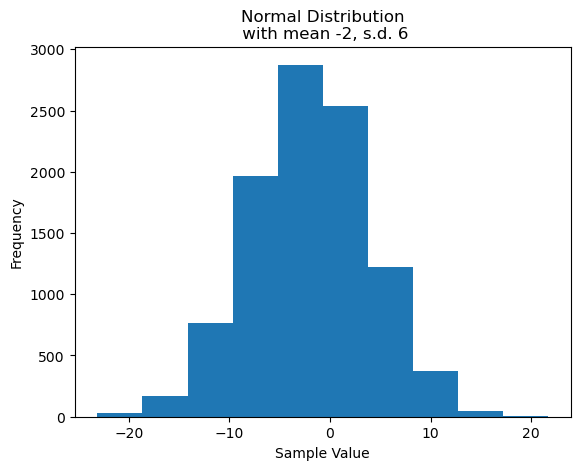

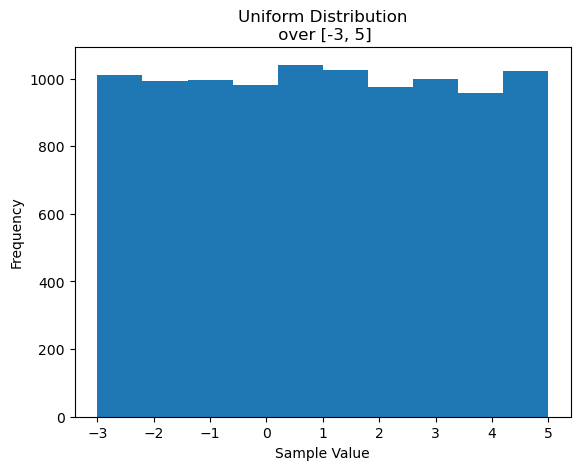

In [15]:
plt.hist(x = normal_samples)
plt.title("Normal Distribution\n with mean -2, s.d. 6")
plt.xlabel("Sample Value")
plt.ylabel("Frequency")
plt.show()

plt.hist(x = unif_samples)
plt.title("Uniform Distribution\n over [-3, 5]")
plt.xlabel("Sample Value")
plt.ylabel("Frequency")
plt.show()

<font size = "5" >

**Multiple plots in a row (subplot)**

Using `plt.subplots`, we can control how multiple figures are displayed

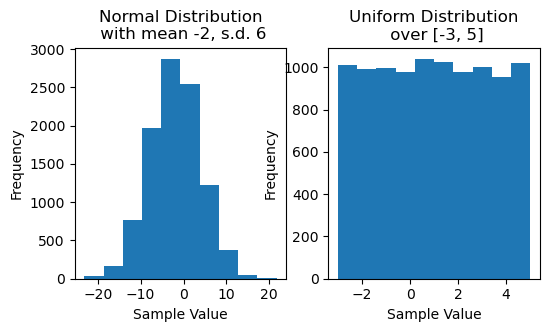

In [16]:
#------------------------ Setting up subplots----------------------------------#
# Create a plot with 1 row, 2 columns
# First, create a "matplotlib Figure" and an array of "sub-figures"

fig, subfig_array = plt.subplots(nrows = 1, ncols = 2,figsize = (6,3))

# plt.subplots has TWO outputs, so we assign the output to TWO variables
# The names we give them are OUR CHOICE
# The option "figsize" indicates the (width,height)) of the graph.
# The complete figure will be 6 inches wide, 3 inches tall


# First Sub-Figure
subfig_array[0].hist(x = normal_samples)
subfig_array[0].set_title("Normal Distribution\n with mean -2, s.d. 6")
subfig_array[0].set_xlabel("Sample Value")
subfig_array[0].set_ylabel("Frequency")

# Second Figure
subfig_array[1].hist(x = unif_samples)
subfig_array[1].set_title("Uniform Distribution\n over [-3, 5]")
subfig_array[1].set_xlabel("Sample Value")
subfig_array[1].set_ylabel("Frequency")

# The tight layout option ensures that the axes are not overlapping
# plt.tight_layout()


plt.show()


<font size = "5">

Now, let's do a version with three plots in the same row. We'll add the histogram of the chi-squared samples too


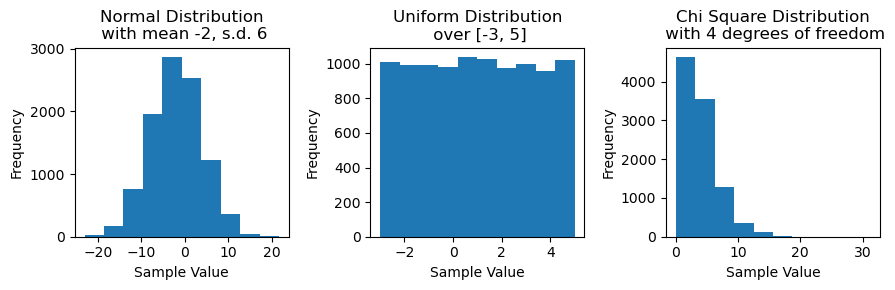

In [17]:
fig, subfig_array = plt.subplots(nrows = 1, ncols = 3, figsize = (9,3))

# First sub-figure
subfig_array[0].hist(x = normal_samples)
subfig_array[0].set_title("Normal Distribution\n with mean -2, s.d. 6")
subfig_array[0].set_xlabel("Sample Value")
subfig_array[0].set_ylabel("Frequency")

# Second sub-figure
subfig_array[1].hist(x = unif_samples)
subfig_array[1].set_title("Uniform Distribution\n over [-3, 5]")
subfig_array[1].set_xlabel("Sample Value")
subfig_array[1].set_ylabel("Frequency")

# Third sub-figure
subfig_array[2].hist(x = chisqr_samples)
subfig_array[2].set_title("Chi Square Distribution\n with 4 degrees of freedom")
subfig_array[2].set_xlabel("Sample Value")
subfig_array[2].set_ylabel("Frequency")

# The tight layout option ensures that the axes are not overlapping
plt.tight_layout()


<font size = "5">

- Now we make a figure with 4 plots arranged in a 2x2 pattern
- Compare standard normal with our normal
- Compare uniform over [0, 1] with uniform over [-3,5]

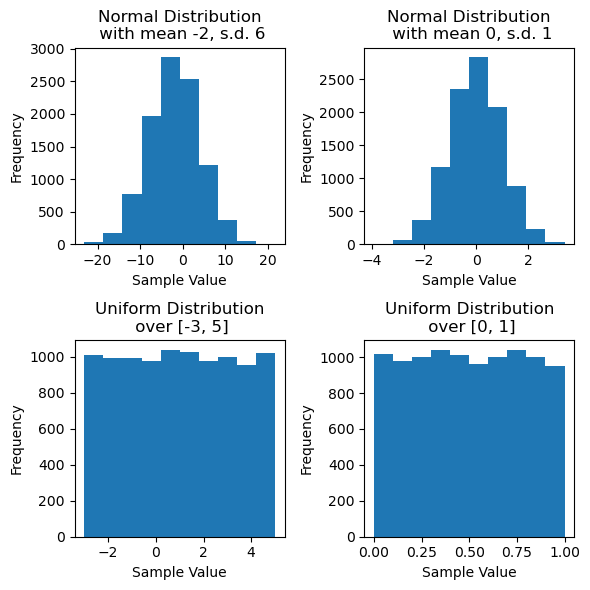

In [18]:
fig, subfig_array = plt.subplots(nrows = 2, ncols = 2, figsize = (6,6))

# First sub-figure
subfig_array[0,0].hist(x = normal_samples)
subfig_array[0,0].set_title("Normal Distribution\n with mean -2, s.d. 6")
subfig_array[0,0].set_xlabel("Sample Value")
subfig_array[0,0].set_ylabel("Frequency")

# second sub-figure
subfig_array[0,1].hist(x = std_normal_samples)
subfig_array[0,1].set_title("Normal Distribution\n with mean 0, s.d. 1")
subfig_array[0,1].set_xlabel("Sample Value")
subfig_array[0,1].set_ylabel("Frequency")

# third sub-figure
subfig_array[1,0].hist(x = unif_samples)
subfig_array[1,0].set_title("Uniform Distribution\n over [-3, 5]")
subfig_array[1,0].set_xlabel("Sample Value")
subfig_array[1,0].set_ylabel("Frequency")


# fourth sub-figure
subfig_array[1,1].hist(x = unit_unif_samples)
subfig_array[1,1].set_title("Uniform Distribution\n over [0, 1]")
subfig_array[1,1].set_xlabel("Sample Value")
subfig_array[1,1].set_ylabel("Frequency")

# The tight layout option ensures that the axes are not overlapping
plt.tight_layout()


## <span style="color:red"> III. Single Loops </span>

<font size = "5">

How does $\bar{X}$ change over different samples of the same size?

In [19]:
# store sample mean in a list
list_xbar = [None, None, None, None]
sample_size = 100

vec_unif  = np.random.uniform(low = -2, high=2, size = sample_size)
list_xbar[0] = vec_unif.mean()

vec_unif  = np.random.uniform(low = -2, high=2, size = sample_size)
list_xbar[1] = vec_unif.mean()

vec_unif  = np.random.uniform(low = -2, high=2, size = sample_size)
list_xbar[2] = vec_unif.mean()

vec_unif  = np.random.uniform(low = -2, high=2, size = sample_size)
list_xbar[3] = vec_unif.mean()

print(list_xbar)
print()
print(np.array(list_xbar))
print("Theoretical mean: ", 0)


[np.float64(0.14657296900727165), np.float64(-0.09889482207911712), np.float64(0.210914865574121), np.float64(0.03227230462368416)]

[ 0.14657297 -0.09889482  0.21091487  0.0322723 ]
Theoretical mean:  0


In [20]:
# store sample mean in a numpy array (vector)
# vec_xbar = np.array([None, None, None, None])

# starting with zeros is more simple than starting with "None"
vec_xbar = np.zeros(4)


sample_size = 100

vec_unif  = np.random.uniform(low = -2, high=2, size = sample_size)
vec_xbar[0] = vec_unif.mean()

vec_unif  = np.random.uniform(low = -2, high=2, size = sample_size)
vec_xbar[1] = vec_unif.mean()

vec_unif  = np.random.uniform(low = -2, high=2, size = sample_size)
vec_xbar[2] = vec_unif.mean()

vec_unif  = np.random.uniform(low = -2, high=2, size = sample_size)
vec_xbar[3] = vec_unif.mean()

print(vec_xbar)
print("Theoretical mean: ", 0)

[-0.06406961 -0.06439403  0.10171989  0.05827697]
Theoretical mean:  0


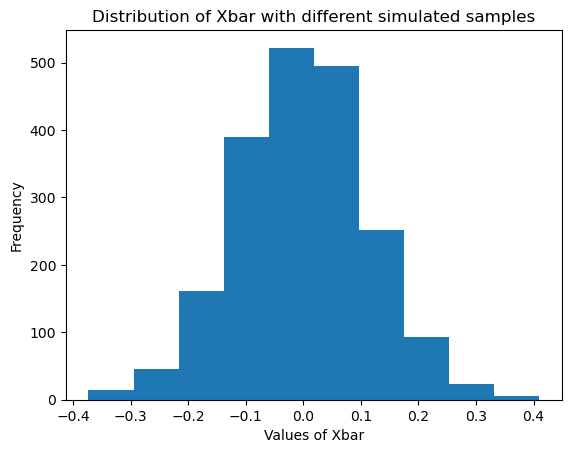

In [21]:
# We will draw random sample "num_simulations" times
# Each time we will create a random vector of size "sample_size"
# In this example we will generate values from a uniform between -2 and 2.

num_simulations = 2000
sample_size     = 100

# using an array starting with zeros
vec_xbar = np.zeros(num_simulations)

# or array filled with None
# vec_xbar = np.full(num_simulations, None, dtype=object)

# using a list
list_xbar = [None] * num_simulations

for iteration in range(num_simulations):
    vec_unif  = np.random.uniform(low = -2, high=2, size = sample_size)
    vec_xbar[iteration] = vec_unif.mean()
    list_xbar[iteration] = vec_unif.mean()


plt.hist(x = vec_xbar)
plt.title("Distribution of Xbar with different simulated samples")
plt.ylabel("Frequency")
plt.xlabel("Values of Xbar")
plt.show()


### **NOTE:** The plot above is a histogram of the 2,000 **sample means** when we drew from the uniform distribution.

### It is **not** a histogram of samples drawn from a uniform distribution.

## <span style="color:red"> IV. Nested Loops </span>

<font size = "5">

What happens to $\bar{X}$ with different $n$?

- The Central Limit Theorem makes a prediction!
- It says that the distribution will have a bell shape with higher $n$.

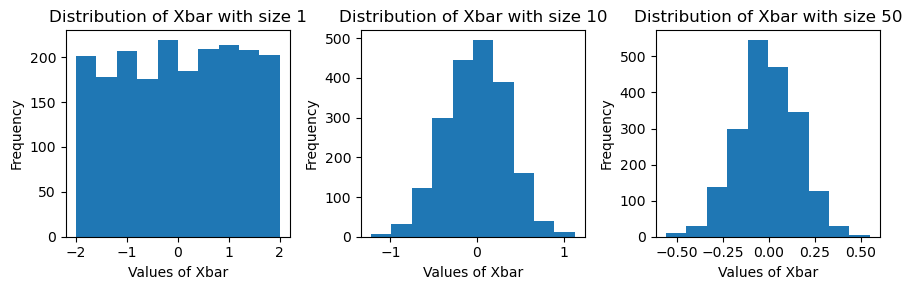

In [22]:
# One way is to write this with repeated code chunks
# We just repeat the code that we had above, with different sample sizes
# Each time will start the process of generating new data from scratch.

fig, subfig_array = plt.subplots(1, 3, figsize = (9,3))

num_simulations = 2000

# Simulate with sample size one
sample_size = 1
vec_xbar = np.zeros(num_simulations)
for iteration in range(num_simulations):
    vec_unif  = np.random.uniform(low = -2, high=2, size = sample_size)
    vec_xbar[iteration] = vec_unif.mean()
subfig_array[0].hist(vec_xbar)
subfig_array[0].set_title("Distribution of Xbar with size 1")
subfig_array[0].set_ylabel("Frequency")
subfig_array[0].set_xlabel("Values of Xbar")


# Simulate with sample size 10
sample_size = 10
vec_xbar = np.zeros(num_simulations)
for iteration in range(num_simulations):
    vec_unif  = np.random.uniform(low = -2, high=2, size = sample_size)
    vec_xbar[iteration] = vec_unif.mean()
subfig_array[1].hist(vec_xbar)
subfig_array[1].set_title("Distribution of Xbar with size 10")
subfig_array[1].set_ylabel("Frequency")
subfig_array[1].set_xlabel("Values of Xbar")

# Simulate with sample size 50
sample_size = 50
vec_xbar = np.zeros(num_simulations)
for iteration in range(num_simulations):
    vec_unif  = np.random.uniform(low = -2, high=2, size = sample_size)
    vec_xbar[iteration] = vec_unif.mean()
subfig_array[2].hist(vec_xbar)
subfig_array[2].set_title("Distribution of Xbar with size 50")
subfig_array[2].set_ylabel("Frequency")
subfig_array[2].set_xlabel("Values of Xbar")

plt.tight_layout()



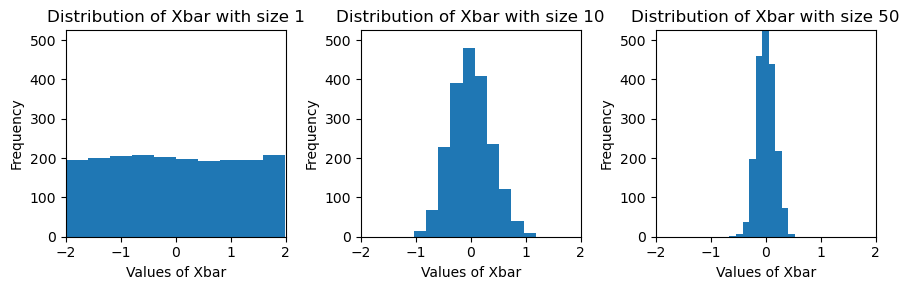

In [23]:
# Let's make all 3 plots have consistent x and y limits

fig, subfig_array = plt.subplots(1, 3, figsize = (9,3))

num_simulations = 2000

# Simulate with sample size one
sample_size = 1
vec_xbar = np.zeros(num_simulations)
for iteration in range(num_simulations):
    vec_unif  = np.random.uniform(low = -2, high=2, size = sample_size)
    vec_xbar[iteration] = vec_unif.mean()


subfig_array[0].hist(vec_xbar)
subfig_array[0].set_title("Distribution of Xbar with size 1")
subfig_array[0].set_ylabel("Frequency")
subfig_array[0].set_xlabel("Values of Xbar")
subfig_array[0].set_xlim(-2,2)


# Simulate with sample size 10
sample_size = 10
vec_xbar = np.zeros(num_simulations)
for iteration in range(num_simulations):
    vec_unif  = np.random.uniform(low = -2, high=2, size = sample_size)
    vec_xbar[iteration] = vec_unif.mean()


subfig_array[1].hist(vec_xbar)
subfig_array[1].set_title("Distribution of Xbar with size 10")
subfig_array[1].set_ylabel("Frequency")
subfig_array[1].set_xlabel("Values of Xbar")
subfig_array[1].set_xlim(-2,2)

# Simulate with sample size 50
sample_size = 50
vec_xbar = np.zeros(num_simulations)
for iteration in range(num_simulations):
    vec_unif  = np.random.uniform(low = -2, high=2, size = sample_size)
    vec_xbar[iteration] = vec_unif.mean()


subfig_array[2].hist(vec_xbar)
subfig_array[2].set_title("Distribution of Xbar with size 50")
subfig_array[2].set_ylabel("Frequency")
subfig_array[2].set_xlabel("Values of Xbar")
subfig_array[2].set_xlim(-2,2)

subfig_array[0].set_ylim(top=525)
subfig_array[1].set_ylim(top=525)
subfig_array[2].set_ylim(top=525)

plt.tight_layout()



<font size = "5">
Let's do with with 2 for loops, one inside the other. (Nested loops)

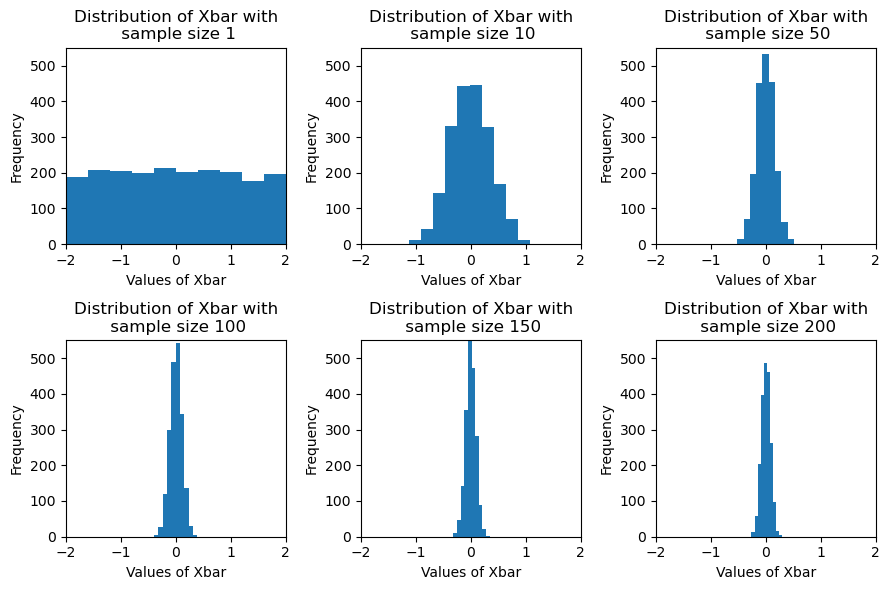

In [24]:
num_simulations = 2000
sample_size_list = [1,10,50,100,150,200]
fig_row = [0, 0, 0, 1, 1, 1]
fig_col = [0, 1, 2, 0, 1, 2]

N = len(sample_size_list)

fig, subfig_array = plt.subplots(2, 3, figsize = (9,6))

xmin = -2
xmax = 2
ymax = 550

for k in range(N):
    sample_sz = sample_size_list[k]
    row = fig_row[k]
    col = fig_col[k]

    vec_xbar = np.zeros(num_simulations)
    for iteration in range(num_simulations):
        vec_unif  = np.random.uniform(low = -2, high=2, size = sample_sz)
        vec_xbar[iteration] = vec_unif.mean()

    subfig_array[row,col].hist(vec_xbar)
    subfig_array[row,col].set_title("Distribution of Xbar with\n sample size " + str(sample_sz))
    subfig_array[row,col].set_ylabel("Frequency")
    subfig_array[row,col].set_xlabel("Values of Xbar") 
    subfig_array[row,col].set_xlim(xmin,xmax) 
    subfig_array[row,col].set_ylim(top=ymax)  

plt.tight_layout()

    


<font size = "5">
Notice that our loop variable "k" traversed the values 0, 1, 2, 3, 4, 5. But the only reason we needed these values was because we needed to access the k-th element of 3 lists. 
<br>

```python
    sample_sz = sample_size_list[k]
    row = fig_row[k]
    col = fig_col[k]
```

The only purpose of "k" was to define these 3 elements. Ideally we would like to do something like:
<br>

```python
    for sample_sz, row, col in something:
```

The ``zip`` function allows us to create an appropiate object for "something"

In [25]:
print(zip(sample_size_list, fig_row, fig_col)) # not helpful at all..

In [26]:
print(list(zip(sample_size_list, fig_row, fig_col)))

[(1, 0, 0), (10, 0, 1), (50, 0, 2), (100, 1, 0), (150, 1, 1), (200, 1, 2)]


In [27]:
zip_list = list(zip(sample_size_list, fig_row, fig_col))
print(zip_list[0])
print(type(zip_list[0]))

(1, 0, 0)
<class 'tuple'>


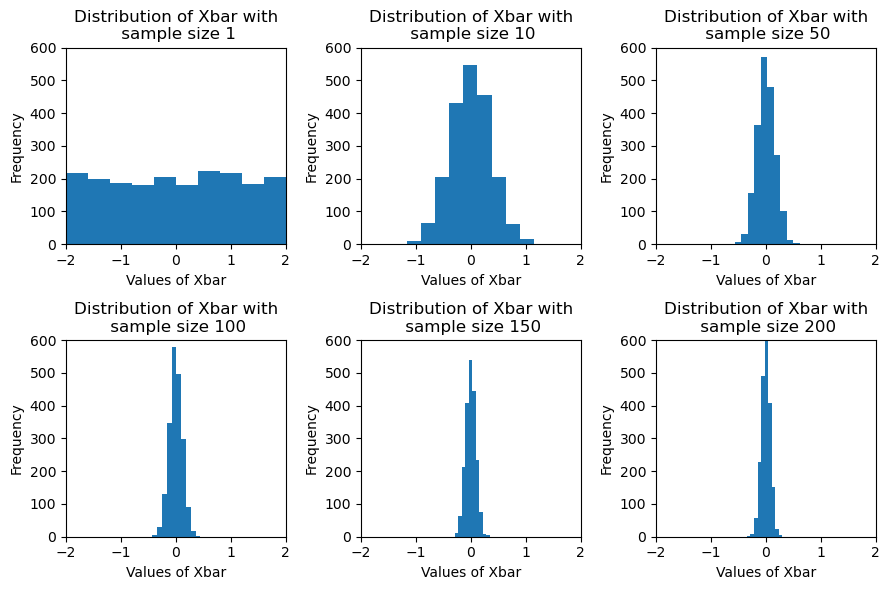

In [28]:
num_simulations = 2000
sample_size_list = [1,10,50,100,150,200]
fig_row = [0, 0, 0, 1, 1, 1]
fig_col = [0, 1, 2, 0, 1, 2]


fig, subfig_array = plt.subplots(2, 3, figsize = (9,6))

xmin = -2
xmax = 2
ymax = 600

for sample_sz, row, col in zip(sample_size_list, fig_row, fig_col):

    vec_xbar = np.zeros(num_simulations)
    for iteration in range(num_simulations):
        vec_unif  = np.random.uniform(low = -2, high=2, size = sample_sz)
        vec_xbar[iteration] = vec_unif.mean()

    subfig_array[row,col].hist(vec_xbar)
    subfig_array[row,col].set_title("Distribution of Xbar with\n sample size " + str(sample_sz))
    subfig_array[row,col].set_ylabel("Frequency")
    subfig_array[row,col].set_xlabel("Values of Xbar") 
    subfig_array[row,col].set_xlim(xmin,xmax) 
    subfig_array[row,col].set_ylim(top=ymax)  

plt.tight_layout()


<font size = "5">
Try it yourself!

- Repeat the above simulation with a few changes
- Write code that puts all the figures in the same row
- Use a Chi-square distribution with (df = 1) instead of a normal

In [29]:
# Write your own solution


